In [ ]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
# Loading the data
data= pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [115]:
def BMI_Cat(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['BMI_Cat'] = data['BMI'].apply(BMI_Cat)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["BMI_Cat"]=encoder.fit_transform(data["BMI_Cat"])

In [116]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,2
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,2
766,1,126,60,0,0,30.1,0.349,47,1,1


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_Cat                   768 non-null    int32  
dtypes: float64(2), int32(1), int64(7)
memory usage: 57.1 KB


In [118]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Cat                     0
dtype: int64

In [119]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
BMI_Cat,768.0,1.139323,0.652038,0.000,1.00000,1.0000,2.00000,3.00


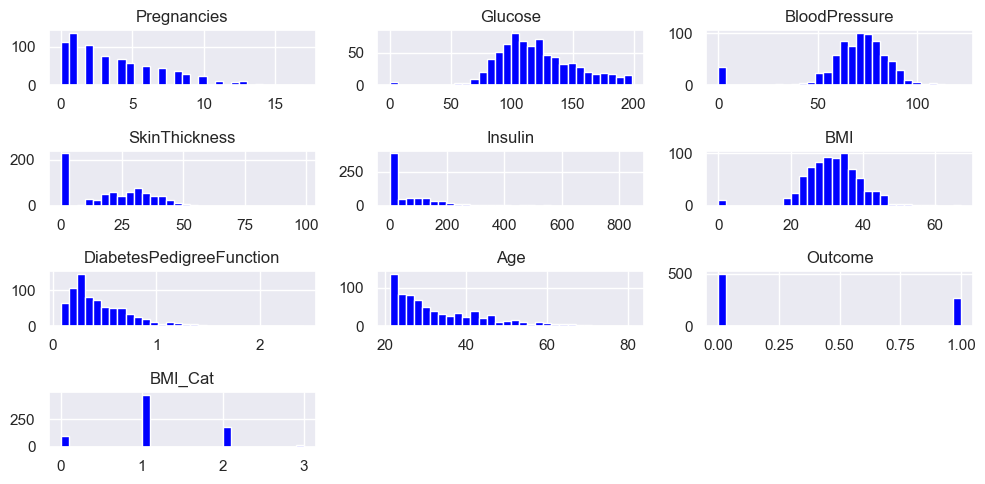

In [120]:
data.hist(bins=30, layout=(4, 3), color='blue',figsize=(10, 5))
plt.tight_layout()
plt.show()

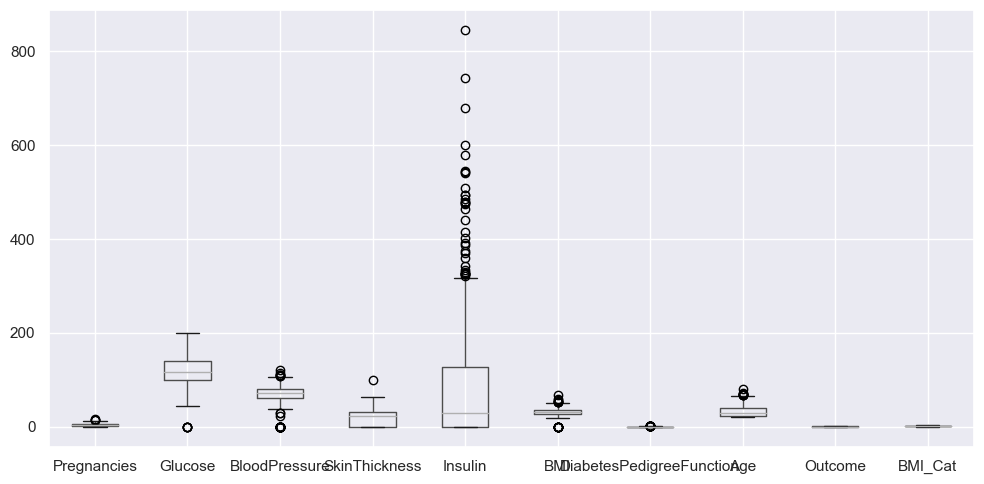

In [121]:
data.boxplot(figsize=(10, 5))
plt.tight_layout()
plt.show()


In [122]:

for col in data.columns:
    zc= data[col]==0
    if zc.sum() > 0:
        print(f"{col} has {zc.sum()} zero values")
        print("\n")



Pregnancies has 111 zero values


Glucose has 5 zero values


BloodPressure has 35 zero values


SkinThickness has 227 zero values


Insulin has 374 zero values


BMI has 11 zero values


Outcome has 500 zero values


BMI_Cat has 102 zero values




In [152]:
unc=data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]
data=data[(unc != 0).all(axis=1)]
for col in data.columns:
    print(data[col].unique())

[ 1  0  3  5 11 10 13  4  9  8  7  2 15  6 17 12 14]
[ 89 137  78 166 118 103 115 126 143 125  97 145 158  88 111 180 171 101
 176 150 187 100 105 141  95 146 139 129  83 110 136 123  81 142 144  71
  93 122 160  99 162 107 120 117 173 170  96 108 154 106 156 109 163 102
 114 104 134  79  75 179 119 128 148 196 140 112 151  87  74 181  91  90
  92 155 191 133  77 161 124 113 152 157 165 130 189 147  84  98 116 127
 138  94 184 135  80  82  86  85 195  68 186 131 164 198 121 188 174 168
 167  56 169 149 153]
[ 66  40  50  72  84  30  70  88  94  82  76  58  60  64 110  80  90  68
  85  86  78  74  48  56  54  52  62  98  65  46 102 100  92  44  24  38
 106]
[23 35 32 19 47 38 30 41 33 26 15 36 11 25 24 21 34 42 39 60 13 27 20 29
 40 18 51 28 31 56 14 37 50 12 46 44 16 22  7 52 10 17 43 45  8 63 48 49]
[ 94 168  88 175 230  83  96 235 146 115 140 110 245  54 192 207  70 240
  82  36  23 300 342 304 142 128  38 100  90 270  71 125 176  48  64 228
  76 220  40 152  18 135  37  51  99 145 2

In [124]:
for col in data.columns:
    zc= data[col]==0
    if zc.sum() > 0:
        print(f"{col} has {zc.sum()} zero values")
        print("\n")

Pregnancies has 56 zero values


Outcome has 262 zero values


BMI_Cat has 44 zero values




In [144]:
data.shape

(367, 10)

In [125]:
Q1 = data["Insulin"].quantile(0.25) 
Q3 = data["Insulin"].quantile(0.75)
IQR = Q3 - Q1

print("IQR:", IQR)
print("Q:", Q1)
print("Q3:", Q3)




IQR: 113.25
Q: 76.75
Q3: 190.0


In [126]:
LOWER_BOUND = Q1 - 1.5 * IQR
UPPER_BOUND = Q3 + 1.5 * IQR
median = data["Insulin"].median()
data= data[(data["Insulin"]>= LOWER_BOUND) & (data["Insulin"]<= UPPER_BOUND)]
#data["Insulin"]= np.where((data["Insulin"]< LOWER_BOUND) | (data["Insulin"]> UPPER_BOUND),median,data["Insulin"])


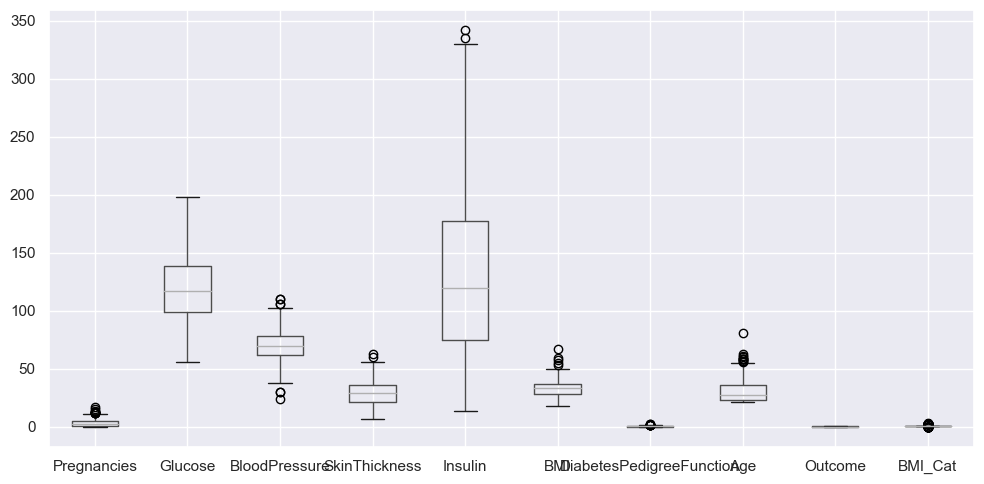

In [127]:
data.boxplot(figsize=(10, 5))
plt.tight_layout()
plt.show()

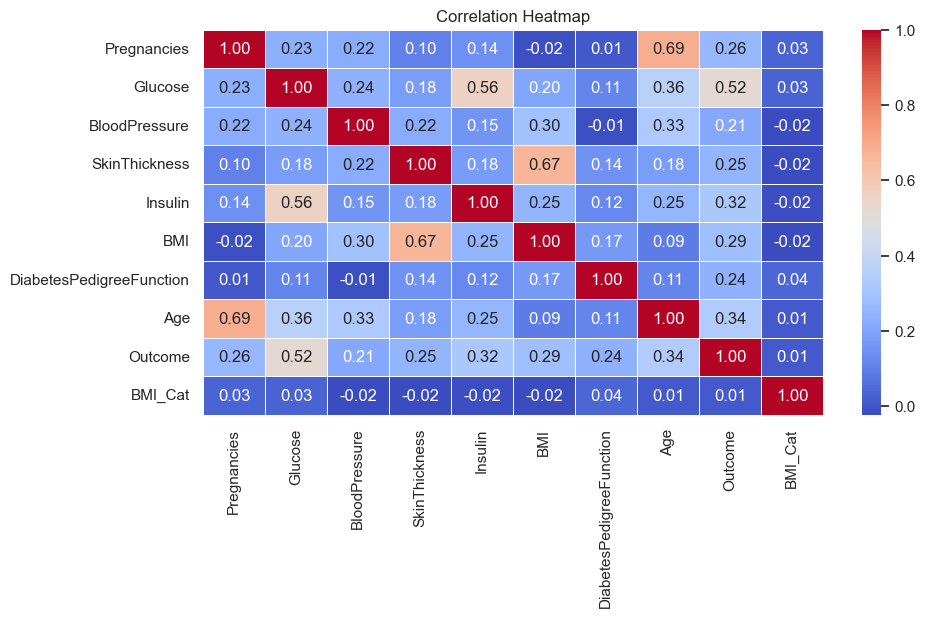

In [128]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [129]:
data["Outcome"].value_counts()

Outcome
0    252
1    115
Name: count, dtype: int64

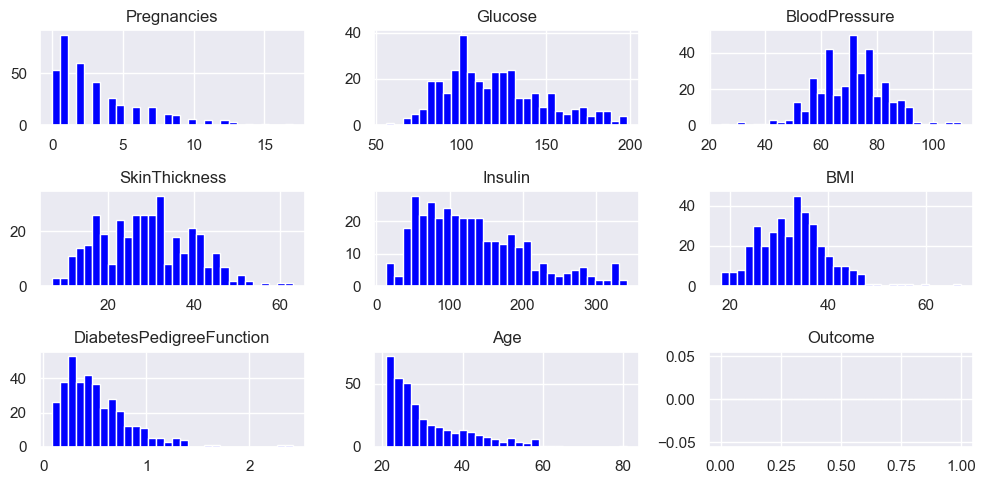

In [130]:
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

from sklearn.preprocessing import power_transform, StandardScaler
scaler= StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x,columns=x.columns)


x_scaled = power_transform(x,method='yeo-johnson')
x_scaled = pd.DataFrame(x, columns=data.columns[:-1])
x_scaled.hist(figsize=(10,5),color='blue', bins=30, layout=(3, 3))
plt.tight_layout()
plt.show()

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#from imblearn.combine import SMOTEENN
#smote = SMOTEENN(random_state=42)
#x_train, y_train = smote.fit_resample(x_train,y_train)

In [132]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [133]:
y_pred = lg_model.predict(x_test)


In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.7027027027027027

In [135]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [136]:
y_pred_dt =dt_model.predict(x_test)
accuracy_dt= accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.6891891891891891

In [137]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=90, random_state=32, max_depth=3, min_samples_split=4, bootstrap=True
)



In [138]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=4, n_estimators=90,
                       random_state=32)

In [139]:
y_pred_df = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_df)
accuracy_rf


0.6756756756756757

In [140]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [141]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [142]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.7652173913043478


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       101
           1       0.63      0.60      0.62        43

    accuracy                           0.78       144
   macro avg       0.73      0.73      0.73       144
weighted avg       0.77      0.78      0.78       144



In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)


In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accurary = accuracy_score(y_test,y_pred_xgb)
accurary

0.75